# Comparison of rotation methods
The experiment consists of providing a list of rotation angles and looping through all the floe shapes in a pair of manually labeled images. For each rotation, the QD method and the SD method are used to find the rotation. We wish to know which is more reliable for finding the true magnitude of the rotation.

In [58]:
import pandas as pd
import proplot as pplt
import numpy as np

In [59]:
df = pd.read_csv('../data/rotation_comparison_test.csv')
df['orientation_est'] = np.rad2deg(df['orientation_rotated'] - df['orientation_init'])
df['eccent_init'] = np.sqrt(1 - df['minor_axis_length_init']**2/df['major_axis_length_init']**2)
df['eccent_rotated'] = np.sqrt(1 - df['minor_axis_length_rotated']**2/df['major_axis_length_rotated']**2)
df['sd_error'] = df['true_rotation'] - df['sd_rotation']
df['qd_error'] = df['true_rotation'] - df['qd_rotation']
len(df)

1540

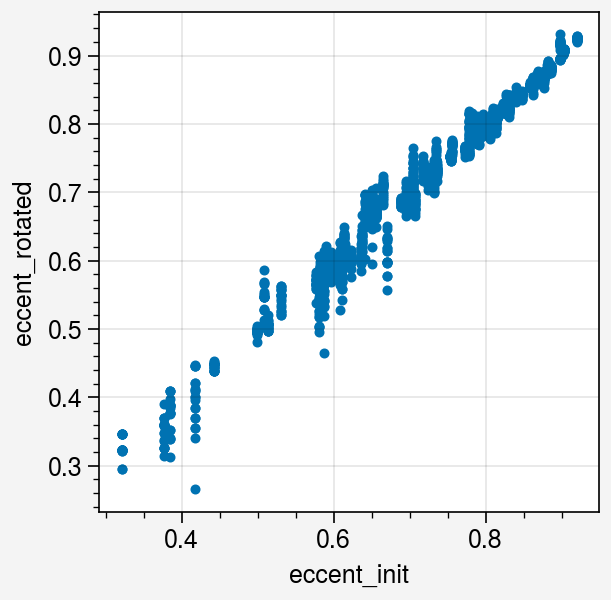

In [60]:
fig, ax = pplt.subplots()
ax.scatter(df['eccent_init'], df['eccent_rotated'], marker='.')

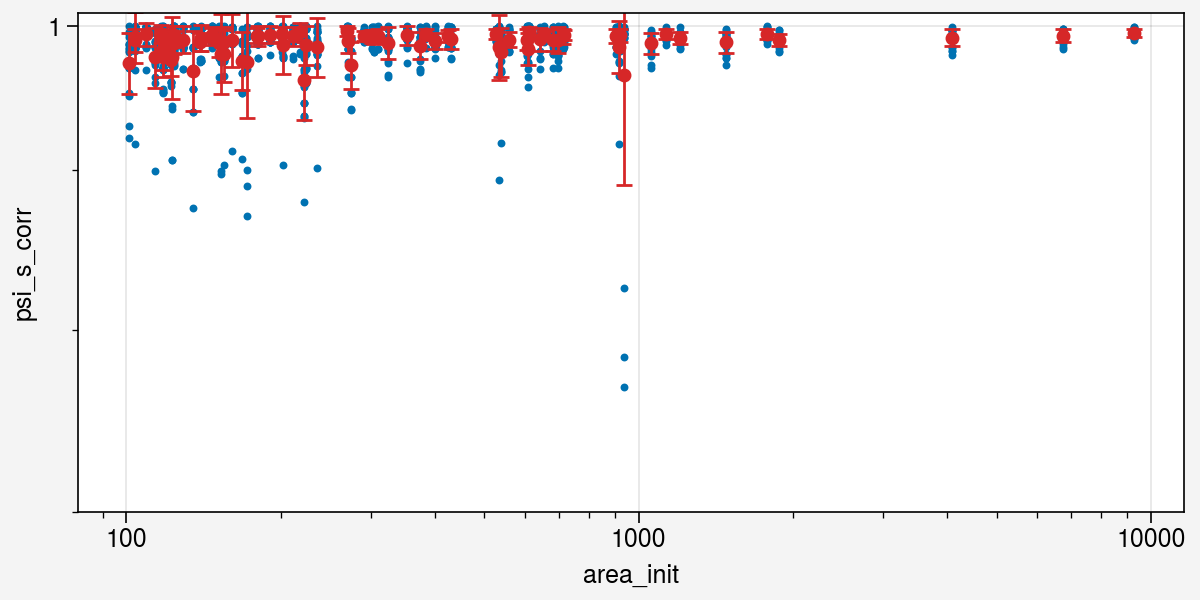

In [61]:
fig, ax = pplt.subplots(width=6, height=3)

ax.scatter(df['area_init'], df['psi_s_corr'], marker='o', ms=5)
dfm = df.groupby('floe_id').mean()
dfs = df.groupby('floe_id').std()
ax.errorbar(dfm['area_init'].values, dfm['psi_s_corr'].values, yerr=dfs['psi_s_corr'].values, lw=0, elinewidth=1,
           marker='o', ms=4, color='tab:red')
ax.format(xscale='log', ylim=(0.7, 1.01), yscale='log')

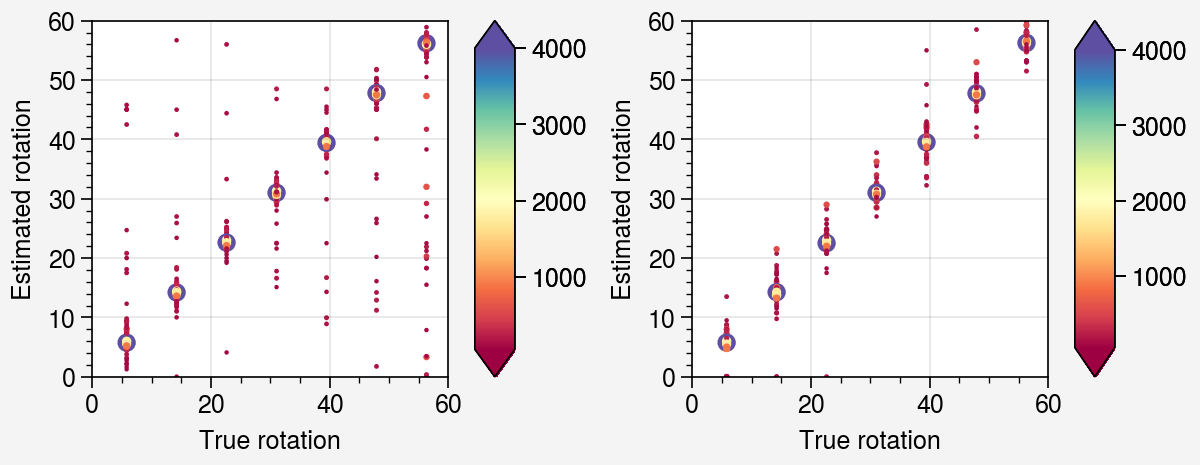

In [62]:
fig, axs = pplt.subplots(width=6, ncols=2, share=False)
axs[0].scatter(df['true_rotation'], df['qd_rotation'],
           m='o', s=df['area_init'], c=df['area_init'], cmap='spectral', colorbar='r', vmin=50, vmax=4e3, extend='both')
axs[1].scatter(df['true_rotation'], df['sd_rotation'],
           m='o', s=df['area_init'], c=df['area_init'], cmap='spectral', colorbar='r', vmin=50, vmax=4e3, extend='both')
axs[0].format(ylabel='Estimated rotation', xlabel='True rotation')
axs[1].format(ylabel='Estimated rotation', xlabel='True rotation')
axs.format(xlim=(0, 60), ylim=(0, 60))

At first glance we can see that small floes (red) have higher error, and we see that there is a smaller range of uncertainties with the SD method in general. However, there are cases where the SD method looks to be off by approximately 180 degrees.
* What if anything to the floes with larger errors have in common?

First, let's look to see how frequently there are large differences within single floes.

Floe 7: 1 bad measure, has two troughs in the SD function

In [63]:
counts = df.groupby('floe_id').apply(lambda data: np.sum(np.abs(data['sd_error']) > 30), include_groups=False)
df_results = df[['floe_id', 'area_init']].groupby('floe_id').mean()
df_results['large_errors'] = counts
df_results.loc[df_results['large_errors'] > 0]

,area_init,large_errors
floe_id,,
35,153.0,19
48,385.0,8
58,218.0,1
81,135.0,11
85,161.0,10
120,682.0,2
128,109.0,2
134,155.0,4


20 rotations were checked for each floe. So the fact that some floes had 15 large errors means that the SD method was usually wrong. Only one of the floes with large errors was larger than 300 pixels.

N:  616
Large errors QD:  12
Large errors SD:  12


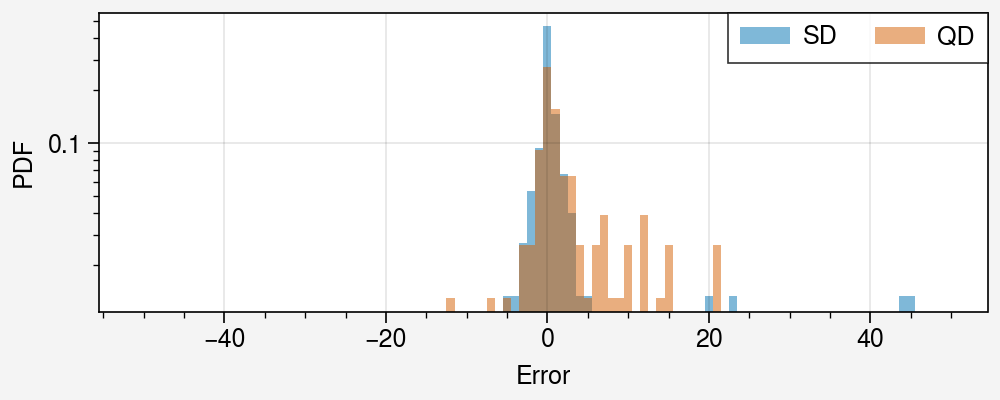

In [64]:
fig, ax = pplt.subplots(width=5, height=2)
idx = df['true_rotation'].between(-1, 65)
# idx = idx & df['area_init'].between(10, 75)
print('N: ', sum(idx))
print('Large errors QD: ', sum(idx & (np.abs(df.loc[idx, 'qd_error']) > 50)))
print('Large errors SD: ', sum(idx & (np.abs(df.loc[idx, 'qd_error']) > 50)))
x = ax.hist(df.loc[idx, ['floe_id', 'sd_error']].groupby('floe_id').mean(), bins=np.arange(-50.5, 50, 1), alpha=0.5, density=True, label='SD')
x = ax.hist(df.loc[idx, ['floe_id', 'qd_error']].groupby('floe_id').mean(), bins=np.arange(-50.5, 50, 1), alpha=0.5, density=True, label='QD')
# x = ax.hist(df['true_rotation']-df['orientation_est'], bins=np.arange(-200, 200, 5), alpha=0.5, density=True)
ax.format(ylabel='PDF', xlabel='Error', yscale='log')
ax.legend()

In [65]:
df.area_init.min()

101.0

N:  328
Large errors QD:  9
Large errors SD:  9
N:  240
Large errors QD:  3
Large errors SD:  3


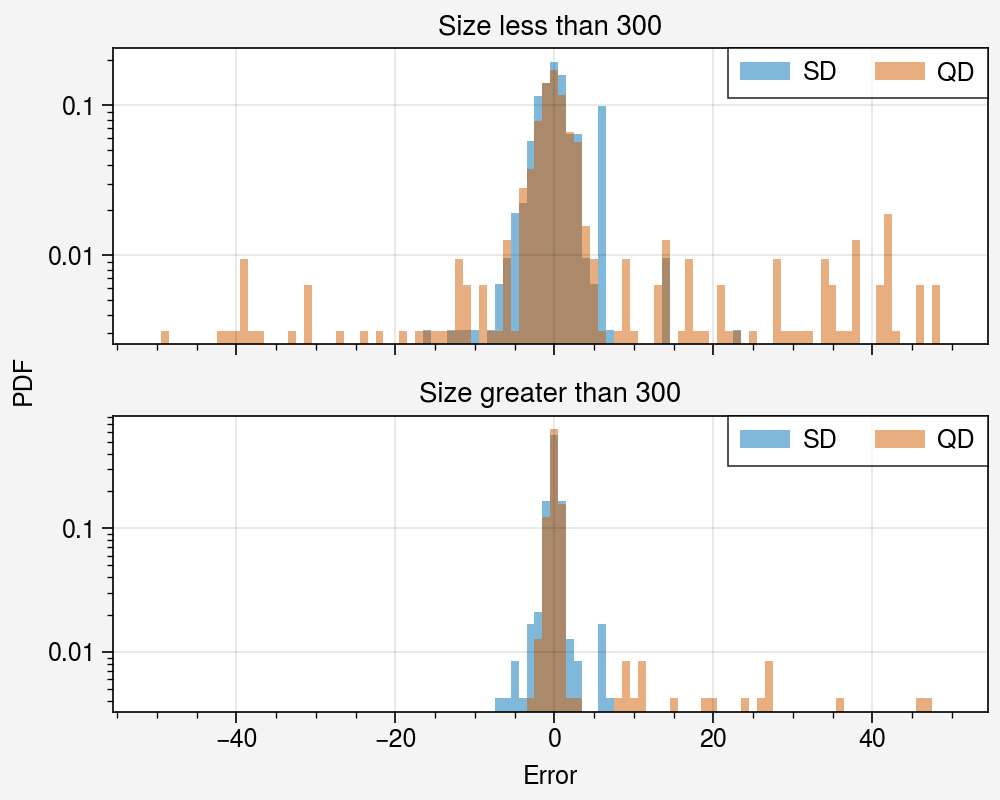

In [66]:
fig, axs = pplt.subplots(width=5, height=4, nrows=2)
ax = axs[0]
idx = df['true_rotation'].between(-1, 65)
idx = idx & df['area_init'].between(100, 300)
print('N: ', sum(idx))
print('Large errors QD: ', sum(idx & (np.abs(df.loc[idx, 'qd_error']) > 50)))
print('Large errors SD: ', sum(idx & (np.abs(df.loc[idx, 'qd_error']) > 50)))
x = ax.hist(df.loc[idx, 'sd_error'], bins=np.arange(-50.5, 50, 1), alpha=0.5, density=True, label='SD')
x = ax.hist(df.loc[idx, 'qd_error'], bins=np.arange(-50.5, 50, 1), alpha=0.5, density=True, label='QD')
# x = ax.hist(df['true_rotation']-df['orientation_est'], bins=np.arange(-200, 200, 5), alpha=0.5, density=True)
ax.format(ylabel='PDF', xlabel='Error', yscale='log', title='Size less than 300')
ax.legend()

ax = axs[1]
idx = df['true_rotation'].between(-1, 65)
idx = idx & df['area_init'].between(300, 1300)
print('N: ', sum(idx))
print('Large errors QD: ', sum(idx & (np.abs(df.loc[idx, 'qd_error']) > 50)))
print('Large errors SD: ', sum(idx & (np.abs(df.loc[idx, 'qd_error']) > 50)))
x = ax.hist(df.loc[idx, 'sd_error'], bins=np.arange(-50.5, 50, 1), alpha=0.5, density=True, label='SD')
x = ax.hist(df.loc[idx, 'qd_error'], bins=np.arange(-50.5, 50, 1), alpha=0.5, density=True, label='QD')
# x = ax.hist(df['true_rotation']-df['orientation_est'], bins=np.arange(-200, 200, 5), alpha=0.5, density=True)
ax.format(ylabel='PDF', xlabel='Error', yscale='log', title='Size greater than 300')
ax.legend()

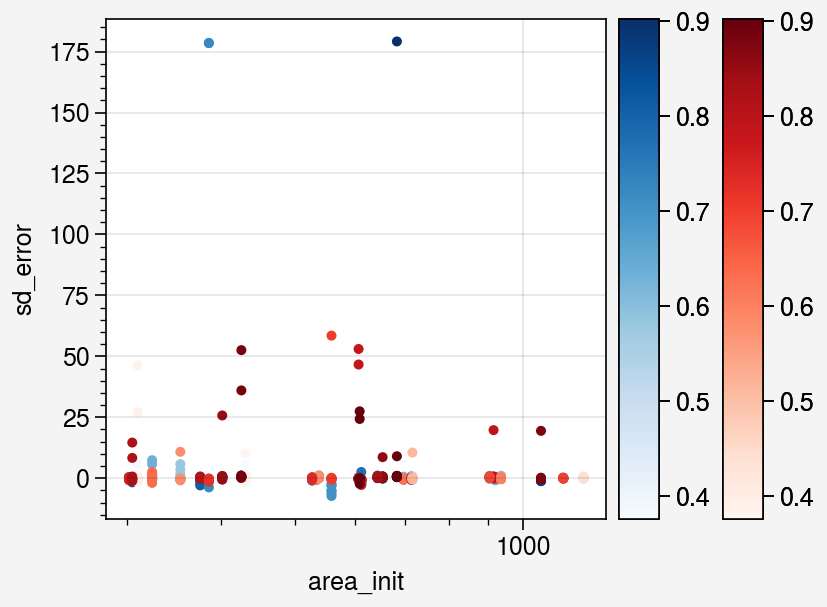

In [68]:
fig, ax = pplt.subplots()
ax.scatter(df.loc[idx, 'area_init'], df.loc[idx, 'sd_error'], m='.', c=df.loc[idx, 'eccent_init'], cmap='blues', colorbar='r')
ax.scatter(df.loc[idx, 'area_init'], df.loc[idx, 'qd_error'], m='.', c=df.loc[idx, 'eccent_init'], cmap='reds', colorbar='r')

ax.format(xscale='log')

In [30]:
df

,floe_id,area_init,area_rotated,major_axis_length_init,major_axis_length_rotated,minor_axis_length_init,minor_axis_length_rotated,true_rotation,orientation_init,orientation_rotated,...,qd_rotation,qd_mismatch,sd_rotation,sd_mismatch,orientation_est,eccent_init,eccent_rotated,sd_error,qd_error,area_change
0,1,612.0,600.0,35.1,34.4,22.3,22.3,-70.000000,0.709,-1.220,...,67.5,0.01340,-67.50,6.230000e+01,-110.523559,0.772243,0.761423,-2.500000,-137.500000,12.0
1,1,612.0,602.0,35.1,34.5,22.3,22.4,-61.578947,0.709,-1.360,...,60.7,0.01300,-61.75,2.990000e+01,-118.544968,0.772243,0.760553,0.171053,-122.278947,10.0
2,1,612.0,602.0,35.1,34.6,22.3,22.2,-53.157895,0.709,-1.510,...,52.3,0.01150,-51.75,3.190000e+01,-127.139335,0.772243,0.767024,-1.407895,-105.457895,10.0
3,1,612.0,597.0,35.1,34.5,22.3,22.2,-44.736842,0.709,1.480,...,43.7,0.01250,-42.25,5.870000e+01,44.175046,0.772243,0.765464,-2.486842,-88.436842,15.0
4,1,612.0,599.0,35.1,34.5,22.3,22.2,-36.315789,0.709,1.330,...,36.0,0.00970,-36.25,2.900000e+01,35.580679,0.772243,0.765464,-0.065789,-72.315789,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,93,538.0,525.0,29.4,28.6,23.9,23.8,56.315789,-0.579,-1.550,...,56.2,0.01310,55.75,3.090000e+01,-55.634202,0.582368,0.554524,0.565789,0.115789,13.0
856,93,538.0,521.0,29.4,28.5,23.9,23.8,64.736842,-0.579,1.460,...,63.6,0.01280,64.00,3.050000e+01,116.826094,0.582368,0.550117,0.736842,1.136842,17.0
857,93,538.0,524.0,29.4,28.5,23.9,23.9,73.157895,-0.579,1.300,...,67.5,0.01670,72.00,3.010000e+01,107.658770,0.582368,0.544753,1.157895,5.657895,14.0
858,93,538.0,525.0,29.4,28.7,23.9,23.9,81.578947,-0.579,1.160,...,29.7,0.10300,80.50,2.950000e+01,99.637361,0.582368,0.553645,1.078947,51.878947,13.0


In [34]:
df_mean = df.loc[idx].groupby('floe_id').mean()

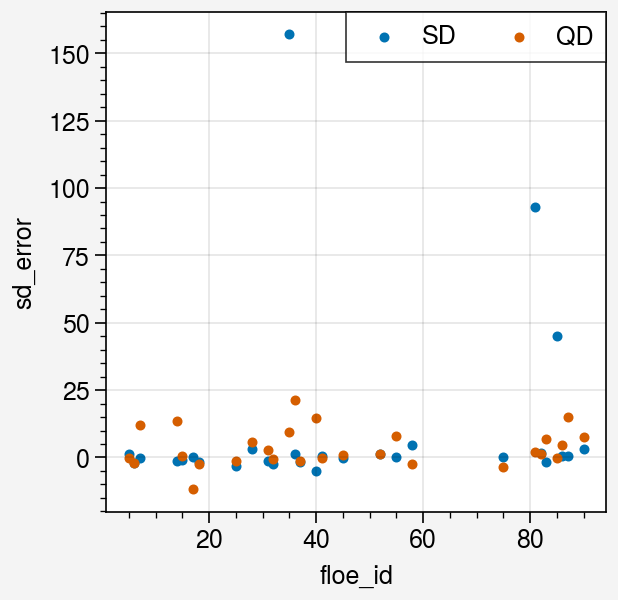

In [35]:
fig, ax = pplt.subplots()
ax.scatter(df_mean.index, df_mean['sd_error'], m='.', label='SD')
ax.scatter(df_mean.index, df_mean['qd_error'], m='.', label='QD')

# ax.format(xscale='log')
ax.legend()

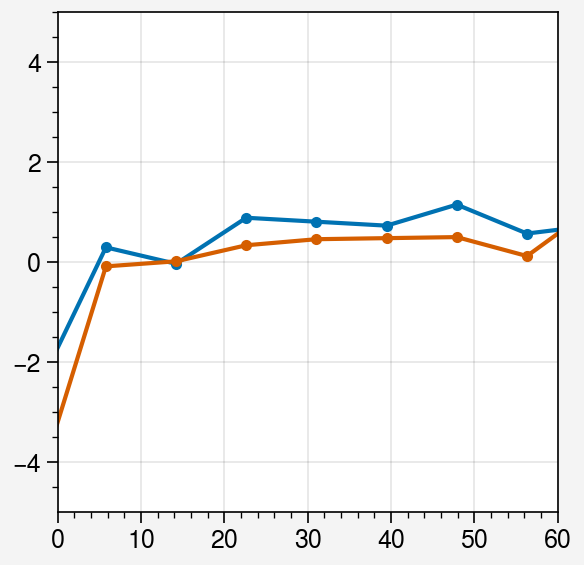

In [33]:
fig, ax = pplt.subplots()
floe_id = 93
ax.plot(df.loc[df.floe_id == floe_id].true_rotation.values,
        df.loc[df.floe_id == floe_id].sd_error.values, marker='.', label='sd')
ax.plot(df.loc[df.floe_id == floe_id].true_rotation.values,
        df.loc[df.floe_id == floe_id].qd_error.values, marker='.', label='qd')
ax.format(xlim=(0, 60), ylim=(-5, 5))